# Query and Visualize 311 Data based on NTA's


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd


c:\Users\cansu\.conda\envs\Data_Analysis\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\cansu\.conda\envs\Data_Analysis\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
c:\Users\cansu\.conda\envs\Data_Analysis\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


## Import NTA Data

<AxesSubplot:>

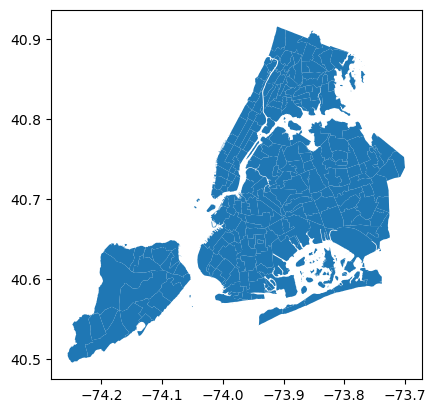

In [2]:
nta_path = r"D:\DATA\NTA\2010 Neighborhood Tabulation Areas (NTAs).geojson"
ntas = gpd.read_file(nta_path)

ntas.plot()

## Import Sensor Data to find NTA's that have sensors in them

(-74.28337047814922, -73.67222994821337, 40.47516404814219, 40.93650271647436)

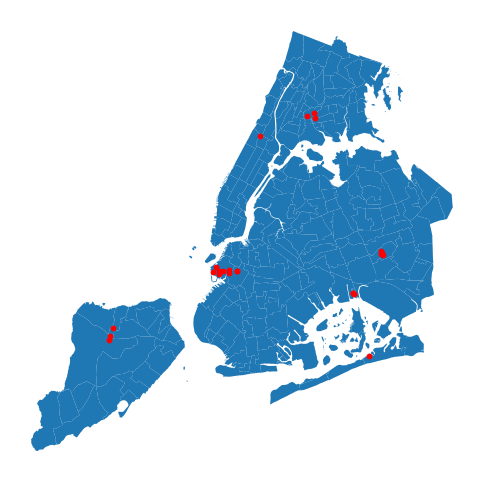

In [3]:
import os 

folder_path = r'D:\WORK\FLOODNET\SensorData'
flood_files = [f for f in os.listdir( folder_path) if f.endswith('.csv')]

flood_data = pd.read_csv(os.path.join(folder_path, flood_files[-3]), engine='pyarrow')

sensor_locations = flood_data.groupby('deployment_id').agg({
    'lat': 'first',
    'lon': 'first',
    'sensor_display_name': 'first'
})

sensor_geo = gpd.GeoDataFrame(sensor_locations, geometry=gpd.points_from_xy(sensor_locations.lon, sensor_locations.lat), crs=4326 )

fig,ax = plt.subplots(figsize=(6,6))
ntas.plot( ax=ax , zorder = 1)
sensor_geo.plot( ax=ax, zorder = 2 , markersize = 10, color = 'red' )
plt.axis('off')

C:\Users\cansu\AppData\Local\Temp\ipykernel_27208\4210817341.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  sensor_geo = sensor_geo[ ~sensor_geo['sensor_display_name'].str.contains('(RETIRED)' ) ]


,ntacode,shape_area,county_fips,ntaname,shape_leng,boro_name,boro_code,geometry,index_right,deployment_id,lat,lon,sensor_display_name
23,QN01,39971928.7066,081,South Jamaica,32122.552258,Queens,4,"MULTIPOLYGON (((-73.77396 40.69981, -73.77446 ...",18,tired_red_monkey,40.691989,-73.792461,Q - Brinkerhoff Ave/157th St
36,MN09,20153942.4143,061,Morningside Heights,20749.4974385,Manhattan,1,"MULTIPOLYGON (((-73.95210 40.81144, -73.95259 ...",7,duly_star_bee,40.811159,-73.954033,M - Morningside Av/125th St
82,SI05,327194482.285,085,New Springville-Bloomfield-Travis,109182.381012,Staten Island,5,"MULTIPOLYGON (((-74.15379 40.61226, -74.15372 ...",20,ugliest_cyan_elephant,40.606940,-74.153458,SI - Loop Rd
92,QN12,61899914.4542,081,Hammels-Arverne-Edgemere,83078.8161714,Queens,4,"MULTIPOLYGON (((-73.76810 40.59785, -73.76795 ...",4,daily_happy_satyr,40.591360,-73.809960,Q - Beach 84 St
114,SI28,36417487.2087,085,Port Richmond,39056.41796,Staten Island,5,"MULTIPOLYGON (((-74.12613 40.64126, -74.12600 ...",1,asleep_apricot_bedbug,40.611330,-74.151058,SI - Willow Rd E/Nina Ave
142,BX08,15084335.3305,005,West Farms-Bronx River,17479.6200042,Bronx,2,"MULTIPOLYGON (((-73.86272 40.83292, -73.86367 ...",22,weekly_fair_dove,40.828427,-73.882035,BX - Colgate Av/Westchester Av
143,BX75,16311864.7327,005,Crotona Park East,24782.2854242,Bronx,2,"MULTIPOLYGON (((-73.87360 40.83980, -73.87283 ...",14,mainly_whole_slug,40.830972,-73.892240,BX - Louis Niñé Bl/Southern Bl
186,QN57,64543967.9738,081,Lindenwood-Howard Beach,79069.2350694,Queens,4,"MULTIPOLYGON (((-73.85722 40.65028, -73.85902 ...",8,easily_dear_mouse,40.654254,-73.831736,Q - Russell St 2
187,BK33,44604418.7896,047,Carroll Gardens-Columbia Street-Red Hook,60813.476236,Brooklyn,3,"MULTIPOLYGON (((-73.99236 40.68969, -73.99262 ...",21,vastly_saving_whale,40.673267,-74.008418,BK - Columbia St/Bay St
188,BK37,42505408.4591,047,Park Slope-Gowanus,31437.3240913,Brooklyn,3,"MULTIPOLYGON (((-73.97376 40.68305, -73.97375 ...",16,overly_heroic_squid,40.673401,-73.994892,BK - 9th St/Smith St


<AxesSubplot:>

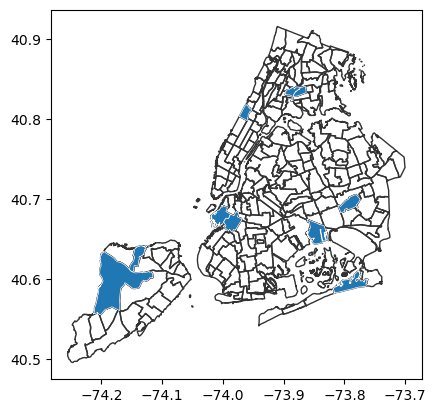

In [4]:
sensor_geo = sensor_geo[ ~sensor_geo['sensor_display_name'].str.contains('(RETIRED)' ) ]

ntas_withSensors = ntas.sjoin(sensor_geo.reset_index(), how='inner', predicate='intersects')
ntas_withSensors = ntas_withSensors.drop_duplicates(subset=['ntacode'])

display(ntas_withSensors )

base = ntas.plot( fc='none', ec = "#333" )
ntas_withSensors.plot( ax=base , ec='w', lw=0.5)

In [47]:

import requests

data_query = 'https://data.cityofnewyork.us/resource/erm2-nwe9.json'
start_date = (pd.Timestamp.today() - pd.Timedelta(days=365*2)).strftime('%Y-%m-%d')

# Add more descriptors here
descriptors = ['Street Flooding (SJ)','Catch Basin Clogged/Flooding (Use Comments) (SC)','Sewer Backup (Use Comments) (SA)','Failure To Retain Water/Improper Drainage- (LL103/89)','Manhole Overflow (Use Comments) (SA1)','Snow/Ice']
descriptors_filter = ' OR '.join([f"descriptor='{d}'" for d in descriptors])
selectors = 'unique_key,created_date,agency,complaint_type,descriptor,status,latitude,longitude'

all_311 = pd.DataFrame()
for i,nta in ntas_withSensors.iterrows():
    
    print(f"Processing {nta.ntacode}")
    polygon = nta.geometry

    # date_extract_y(created_date)>2022`
    url = f"{data_query}?$where=within_polygon(location, '{polygon}') AND created_date>'{start_date}' AND ({descriptors_filter})&$select={selectors}&$limit=5000"

    response = requests.get(url)
    if response.status_code != 200:
        print(f"Error {response.status_code} for {nta.ntacode}")
        continue
    else:

        data = response.json()
        temp_data = pd.DataFrame( data )
        temp_data['ntacode'] = nta.ntacode
        temp_data['ntaname'] = nta.ntaname

        all_311 = pd.concat( [all_311, temp_data] )

all_311

Processing QN01
Processing MN09
Processing SI05
Error 400 for SI05
Processing QN12
Error 414 for QN12
Processing SI28
Processing BX08
Processing BX75
Processing QN57
Processing BK33
Processing BK37


,unique_key,created_date,agency,complaint_type,descriptor,status,latitude,longitude,ntacode,ntaname
0,57423901,2023-04-26T08:44:00.000,DEP,Sewer,Sewer Backup (Use Comments) (SA),Closed,40.69094298227469,-73.79059076173479,QN01,South Jamaica
1,57423249,2023-04-26T08:17:00.000,DEP,Sewer,Sewer Backup (Use Comments) (SA),Closed,40.69990640672261,-73.77975405280347,QN01,South Jamaica
2,57426932,2023-04-26T07:38:00.000,DEP,Sewer,Sewer Backup (Use Comments) (SA),Closed,40.68986130651341,-73.80775830528847,QN01,South Jamaica
3,57422679,2023-04-25T21:02:00.000,DEP,Sewer,Sewer Backup (Use Comments) (SA),Closed,40.696289484244176,-73.79192631688956,QN01,South Jamaica
4,57421091,2023-04-25T10:59:00.000,DEP,Sewer,Sewer Backup (Use Comments) (SA),Closed,40.694657485855736,-73.78361557369846,QN01,South Jamaica
...,...,...,...,...,...,...,...,...,...,...
665,50420608,2021-04-29T12:11:00.000,DEP,Sewer,Sewer Backup (Use Comments) (SA),Closed,40.66474778630666,-73.99302520343944,BK37,Park Slope-Gowanus
666,50407292,2021-04-28T15:22:22.000,DOB,Plumbing,Failure To Retain Water/Improper Drainage- (LL...,Closed,40.66775612299733,-73.99410269673288,BK37,Park Slope-Gowanus
667,50405105,2021-04-28T13:26:00.000,DEP,Sewer,Sewer Backup (Use Comments) (SA),Closed,40.66474778630666,-73.99302520343944,BK37,Park Slope-Gowanus
668,50414138,2021-04-28T12:12:00.000,DEP,Sewer,Sewer Backup (Use Comments) (SA),Closed,40.664865835538215,-73.99342890096585,BK37,Park Slope-Gowanus


2021-04-27T12:35:00.000 2023-04-23T15:17:00.000


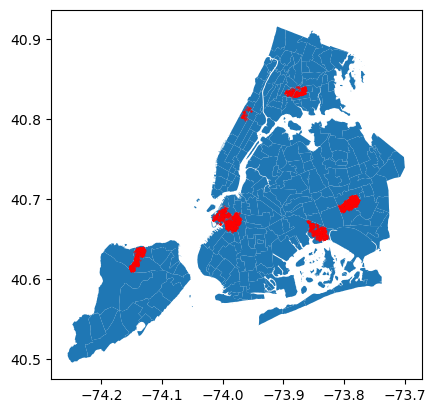

In [45]:
base = ntas.plot()
gpd.GeoDataFrame(
    all_311,
    geometry=gpd.points_from_xy(all_311.longitude, all_311.latitude),
    crs=4326
).plot( ax = base, color='red', markersize=0.1 );

print( temp_data['created_date'].min() , temp_data['created_date'].max() )


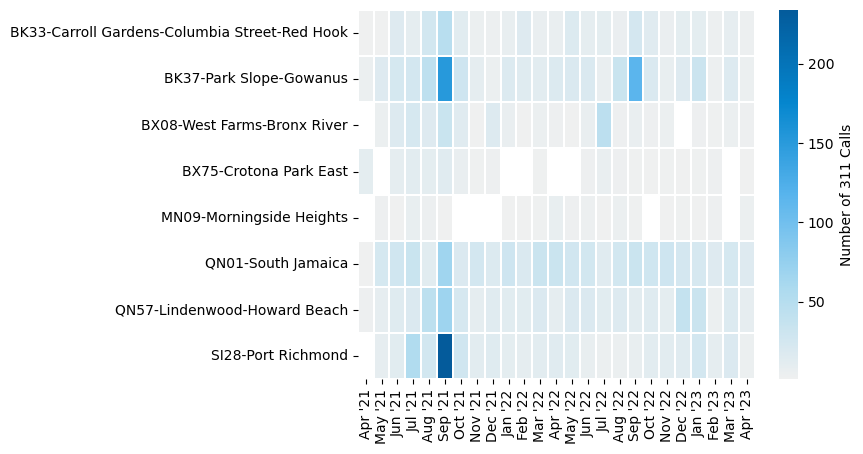

In [66]:
all_311['month'] = pd.to_datetime(all_311['created_date']).dt.month
all_311['month'] = all_311['month'].astype(str).str.zfill(2)
all_311['year'] = pd.to_datetime(all_311['created_date']).dt.year

pt = pd.pivot_table(
    all_311,
    index=['ntacode','ntaname'],
    columns=['year','month'],
    values='unique_key',
    aggfunc=len
)


pt.columns = [ pd.to_datetime(f"{c[0]}-{c[1]}-01").strftime("%b '%y") for c in pt.columns ]
pt

def make_Ramp( ramp_colors ): 
    from colour import Color
    from matplotlib.colors import LinearSegmentedColormap

    color_ramp = LinearSegmentedColormap.from_list( 'my_list', [ Color( c1 ).rgb for c1 in ramp_colors ] )
    return color_ramp

custom_ramp = make_Ramp( ['#EFF0F0',"#ABDAEF","#58B4ED", '#0586CE', '#045B9B'] ) 

sns.heatmap(
    pt,
    linewidths=0.1,
    linecolor='white',
    cbar_kws={'label': 'Number of 311 Calls'},
    cmap = custom_ramp
)

plt.ylabel('')
plt.xlabel('');